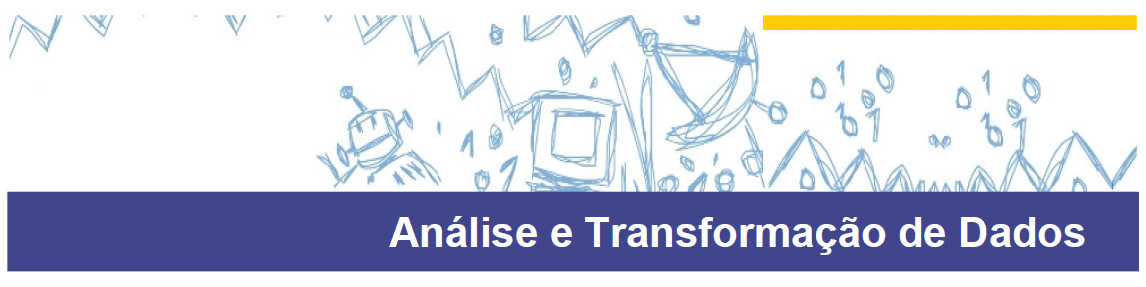
### Uma Resolução da Ficha Prática nº 8 de ATD 2021 usando Python
Alberto Cardoso ©DEI2019/2020

Objetivo: Pretende-se usar a Transformada de Fourier Discreta (DFT) para ilustrar os conceitos de frequência em sinais áudio e em imagens e para efetuar a sua análise no tempo e na frequência, usando a Transformada de Fourier em Janelas (STFT) de dimensão fixa.

**Exercício 1.** Considerar o sinal de áudio do ficheiro 'escala.wav' (disponível no Nónio).

In [ ]:
import numpy as np
#import matplotlib
#matplotlib.use('nbagg')  # possibilidade de interagir com as figuras
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import spectrogram
from scipy.io import wavfile
from playsound import playsound

**Exercício 1.1** Ler e escutar o sinal áudio, utilizando as funções do Matlab *audioread* e *sound*.

FP8 - Exercício 1.1


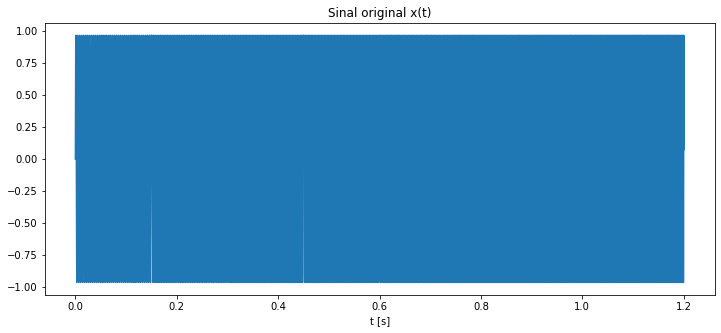

In [2]:
print('FP8 - Exercício 1.1')
# Ex1.1 Ler e escutar o sinal áudio

fich_wav = 'escala.wav'
#fich_wav = 'sax-phrase-short.wav'

fs, x = wavfile.read(fich_wav)
playsound(fich_wav)

x = x/2**15   # Normalização dos dados para o intervalo -1 a 1

t = np.linspace(0,(len(x)-1)/fs,len(x))

plt.figure(figsize=(12,5))
plt.plot(t,x)
plt.xlabel('t [s]')
plt.title('Sinal original x(t)')
plt.show()

**Exercício 1.2** Indicar a frequência de amostragem ($f_s$), o período fundamental ($N$) e a frequência fundamental ($\Omega_0$) do sinal de tempo discreto $x[n]$ e a resolução em frequência (em Hz).

In [3]:
print('FP8 - Exercício 1.2\n')
# Ex 1.2
print('frequência de amostragem, fs, [Hz]:')
print('fs =', fs, 'Hz\n')
Ts = 1/fs;

print('período fundamental, N:')
N = len(x)
print('N =', N,'\n')

print('frequência angular fundamental, Omega0, [rad]')
Omega0 = 2*np.pi/N
print('Omega0 =', Omega0, 'rad\n')

print('resolução em frequência [Hz]:')
deltaf = fs/N
print('deltaf =', deltaf, 'Hz')

FP8 - Exercício 1.2

frequência de amostragem, fs, [Hz]:
fs = 8000 Hz

período fundamental, N:
N = 9608 

frequência angular fundamental, Omega0, [rad]
Omega0 = 0.000653953508241006 rad

resolução em frequência [Hz]:
deltaf = 0.832639467110741 Hz


**1.3**	Obter e representar o espetro (magnitude) de $x[n]$, usando as funções *fft*, *fftshift* e *abs*.

FP8 - Exercício 1.3



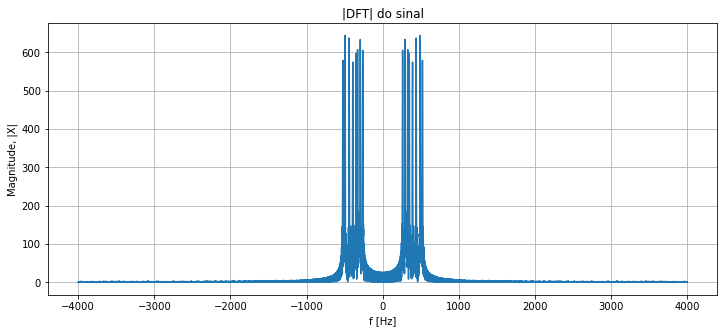

In [4]:
print('FP8 - Exercício 1.3\n')
# Ex 1.3

X = np.fft.fftshift(np.fft.fft(x)); # DFT do sinal

# calcular o vetor de frequências
if np.mod(N,2)==0:
    # se o número de pontos do sinal for par
    f = np.linspace(-fs/2,fs/2-fs/N,N)
    Omega=np.linspace(-np.pi,np.pi-2*np.pi/N,N)
else:
    # se o número de pontos do sinal for ímpar
    f = np.linspace(-fs/2+fs/N/2,fs/2-fs/N/2,N)
    Omega=np.linspace(-np.pi+np.pi/N,np.pi-np.pi/N,N)

m_X = abs(X) # magnitude do sinal

plt.figure(figsize=(12,5))
plt.plot(f,m_X)
plt.title('|DFT| do sinal')
plt.ylabel('Magnitude, |X|')
plt.xlabel('f [Hz]')
plt.grid()
plt.show()

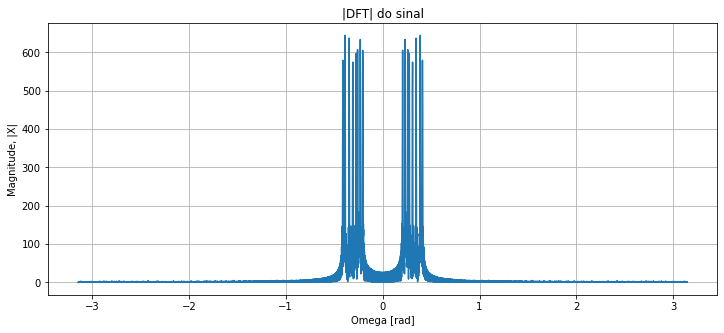

In [5]:
plt.figure(figsize=(12,5))
plt.plot(Omega,m_X)
plt.title('|DFT| do sinal')
plt.ylabel('Magnitude, |X|')
plt.xlabel('Omega [rad]')
plt.grid()
plt.show()

**1.4**	Identificar as frequências angulares ($\Omega$ em $rad$) e as frequências ($f$ em Hz) mais relevantes do sinal (considerar as frequências cujas componentes têm magnitude superior a, por exemplo, 20\% do valor máximo).

FP8 - Exercício 1.4


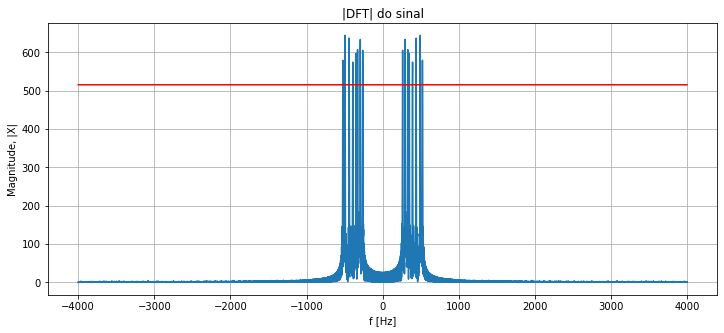

Frequências angulares relevantes [rad]:
[0.20599536 0.23084559 0.25896559 0.27335257 0.30866606 0.34594141
 0.38779443 0.4106828 ]

Frequências relevantes [Hz]:
[262.28143214 293.92173189 329.72522898 348.04329725 393.00582848
 440.4662781  493.755204   522.89758535]
[262. 294. 330. 348. 393. 440. 494. 523.]


In [6]:
print('FP8 - Exercício 1.4')
# Ex 1.4

plt.figure(figsize=(12,5))
plt.plot(f,m_X)
plt.title('|DFT| do sinal')
plt.ylabel('Magnitude, |X|')
plt.xlabel('f [Hz]')
plt.grid()

max_x = max(m_X)

min_mag = 0.8*max_x
#min_mag = 0.1*max_x

plt.plot(f, np.tile(min_mag,(N,1)),'r')
plt.show()

locs, _ = find_peaks(m_X,min_mag)

f_relev = f[locs]
f_relev = f_relev[np.where(f_relev>0)]

print('Frequências angulares relevantes [rad]:')
Omega_relev = Omega[locs]
Omega_relev = Omega_relev[np.where(Omega_relev>0)]
print(Omega_relev)

print('\nFrequências relevantes [Hz]:')
print(f_relev)
print(np.round(f_relev))

**1.5**	Determinar as notas musicais associadas às frequências mais relevantes do sinal, considerando a seguinte tabela:
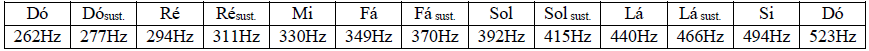

**Nota sobre o Exercício 1**:
A tabela apresentada no enunciado do exercício corresponde a uma parte do conjunto de todas as notas musicais. Os sons audíveis pelos humanos correspondem, usualmente, a frequências compreendidas entre 20Hz e 20KHz. Estando as notas musicais organizadas por oitavas, as suas frequências tomam o valor do dobro da frequência das notas uma oitava acima e reduzem a metade quando estão uma oitava abaixo. Na figura seguinte apresenta-se um conjunto mais alargado de notas musicais e respetivas frequências (com os valores mais exatos), sendo as notas correspondentes às teclas pretas os sustenidos.
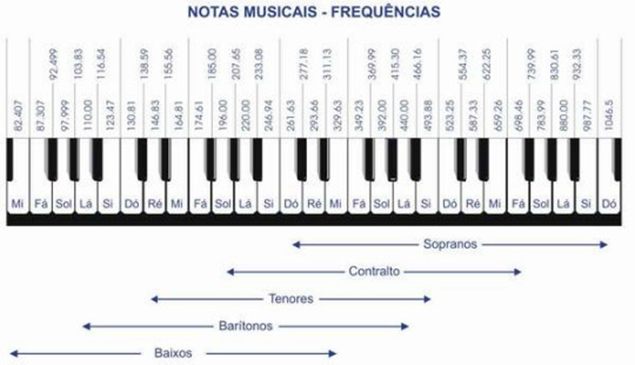

In [7]:
print('FP8 - Exercício 1.5')

# Ex 1.5

f_notas = np.array([262, 277, 294, 311, 330, 349, 370, 392, 415, 440, 466, \
    494, 523, 587, 659, 698, 784, 880, 988, 1047, 1174, 1318, 1396, \
    1568, 1760, 1976, 2094, 2348, 2636, 2792, 3136, 3520, 3952, 4188, 4696, 5272]).T
notas = np.array(['Dó   ', 'DóS  ', 'Ré   ', 'RéS  ', 'Mi   ', \
    'Fá   ', 'FáS  ', 'Sol  ', 'SolS ', 'Lá   ', 'LáS  ', 'Si   ', \
    'Dó2  ', 'DóS2 ', 'Ré2  ', 'RéS2 ', 'Mi2  ', \
    'Fá2  ', 'FáS2 ', 'Sol2  ', 'SolS2', 'Lá2  ', 'Lás2 ', 'Si2  ', \
    'Dó3  ', 'Dó s3', 'Ré3  ', 'Rés 3', 'Mi2  ', \
    'Fá3  ', 'FáS3 ', 'Sol3  ', 'SolS3', 'Lá3  ', 'LáS3 ', 'Si3  '])

ind_nj = np.array([], dtype=np.int64)

for k in range(len(f_relev)):
    
    # encontrar quais as notas na gama de frequências 
    # [f_relevant(k)-9Hz, f_relevant(k)+9Hz]
    
    ind_freq = np.where(abs(f_notas-f_relev[k])<9)
    ind_nj = np.append(ind_nj,ind_freq)

print('Notas musicais presentes no sinal:')
notas_xj = notas[ind_nj]
print(notas_xj)

FP8 - Exercício 1.5
Notas musicais presentes no sinal:
['Dó   ' 'Ré   ' 'Mi   ' 'Fá   ' 'Sol  ' 'Lá   ' 'Si   ' 'Dó2  ']


**Exercício 1.6** Repetir o exercício para outro sinal de áudio como, por exemplo, o 'sax-phrase-short.wav'.

In [8]:
print('FP8 - Exercício 1.6')

# Alterar em 1.1 o sinal a considerar
# e ajustar, se necessário, a percentagem para o limiar a considerar em 1.4

FP8 - Exercício 1.6


**Exercício 2** A Transformada de Fourier Discreta (DFT) possibilita o processamento de imagens permitindo, por exemplo, a análise computacional de imagens, a filtragem de imagens, a extração de características, a compressão / reconstrução de imagens, etc. A aplicação da DFT permite decompor uma imagem em termos das suas componentes sinusoidais, aceitando como entrada uma imagem definida no domínio do espaço real, produzindo como saída uma imagem definida no domínio das frequências espaciais. Um ponto na imagem de saída corresponde a uma frequência na imagem de entrada. Por exemplo, o pixel no centro geométrico da imagem de saída corresponde à componente DC da imagem. Quando os restantes pixéis são percorridos do centro para a periferia obtêm-se valores crescentes de frequências na imagem de entrada.
Considerar a imagem do ficheiro **'peppers.bmp'**.


**Exercício 2.1** Ler a imagem usando a função *imread*.

In [9]:
print('FP8 - Exercício 2.1')
#imagem = Image.open('peppers.bmp')
imagem = plt.imread('peppers.bmp')
ind = np.array(imagem)

FP8 - Exercício 2.1


**Exercício 2.2** Representar a imagem original, usando a função *imshow*.

FP8 - Exercício 2.2


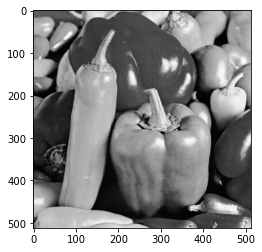

In [10]:
print('FP8 - Exercício 2.2')

plt.imshow(ind,cmap='gray')

**Exercício 2.3** Obter as componentes de frequência da imagem usando as funções *fft2* e *fftshift* e representar graficamente a sua magnitude em função do domínio definido em termos das dimensões (entre $-N/2$ e $N/2$) da imagem (considere a função *mesh* e $20*log10(abs(  ))$).
Caraterizar a magnitude do espetro da imagem e obter a cor média da imagem (vetor do mapa de cores correspondente à componente DC da imagem ou à frequência zero).


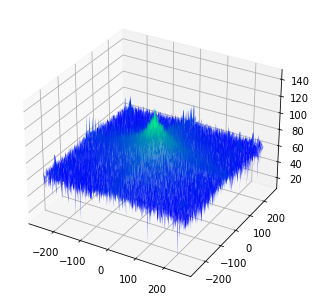

In [11]:
X_imagem = np.fft.fftshift(np.fft.fft2(imagem))

N = len(X_imagem)

eixo = np.linspace(-N/2,N/2-1, N)

fig = plt.figure()       # cria figura para visualização 3D
ax = fig.add_axes([1, 1, 1, 1],projection='3d')

eixo_X,eixo_Y=np.meshgrid(eixo,eixo)
ax.plot_surface(eixo_X, eixo_Y, 20*np.log10(np.abs(X_imagem)),cmap='winter')
plt.show()

Índice da cor média no mapa de cores da imagem:
C0 = 104.20986938476562
Côr média = 104.20986938476562


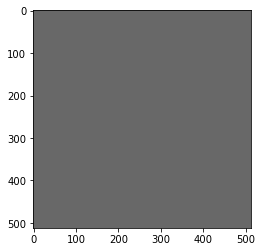

In [12]:
print('Índice da cor média no mapa de cores da imagem:')
C0=np.abs(X_imagem[int(N/2),int(N/2)])/N/N
print('C0 =', C0)
print('Côr média =', np.mean(np.mean(imagem)))

plt.imshow(int(C0)*np.ones(imagem.shape, dtype=np.int64), cmap='gray', vmin=0,vmax=255)

**Exercício 3.** Para efetuar a análise de sinais simultaneamente no tempo e na frequência pode recorrer-se à Transformada de Fourier em Janelas (STFT – *Short Time Fourier Transform*).

**Exercício 3.1** Ler o sinal áudio do ficheiro **'escala.wav'** e determinar a frequência mais relevante em sucessivas janelas temporais com duração e sobreposição apropriadas (i.e., duração: 128ms e sobreposição: 64ms). Em cada janela, determinar a magnitude do espetro recorrendo a uma janela de *Hamming* (função ***hamming*** do Matlab) e selecionar a frequência fundamental como sendo a frequência mais relevante (valor da DFT com maior amplitude).

FP8 - Exercício 3.1


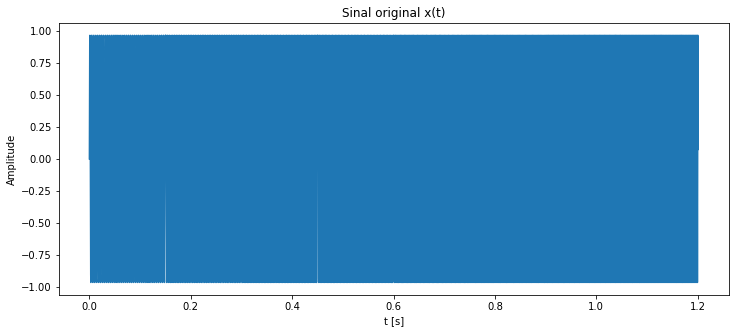

In [13]:
print('FP8 - Exercício 3.1');
# Ex3.1 Ler o sinal áudio

fich_wav = 'escala.wav'
#fich_wav = 'sax-phrase-short.wav'

fs, x = wavfile.read(fich_wav)

x = x/2**15   # Normalização dos dados para o intervalo -1 a 1

t = np.linspace(0,(len(x)-1)/fs,len(x))

plt.figure(figsize=(12,5))
plt.plot(t,x)
plt.xlabel('t [s]')
plt.ylabel('Amplitude')
plt.title('Sinal original x(t)')
plt.show()

frequência de amostragem, f, [Hz]:
fs = 8000 Hz
período fundamental, N:
N = 9608


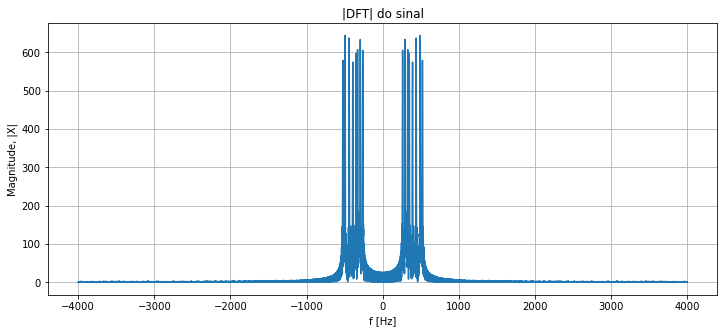

In [14]:
print('frequência de amostragem, f, [Hz]:')
print('fs =', fs, 'Hz')
Ts = 1/fs

print('período fundamental, N:')
N = len(x)
print('N =', N)

X = np.fft.fftshift(np.fft.fft(x)) # DFT do sinal

# calcular o vetor de frequências
if np.mod(N,2)==0:
    # se o número de pontos do sinal for par
    f = np.linspace(-fs/2,fs/2-fs/N,N)
else:
    # se o número de pontos do sinal for ímpar
    f = np.linspace(-fs/2+fs/N/2,fs/2-fs/N/2,N)

m_X = abs(X) # magnitude do sinal

plt.figure(figsize=(12,5))
plt.plot(f,m_X)
plt.title('|DFT| do sinal')
plt.ylabel('Magnitude, |X|')
plt.xlabel('f [Hz]')
plt.grid()
plt.show()

Tframe = 0.128 s
Toverlap = 0.064 s
Nframe = 1024
Noverlap = 512


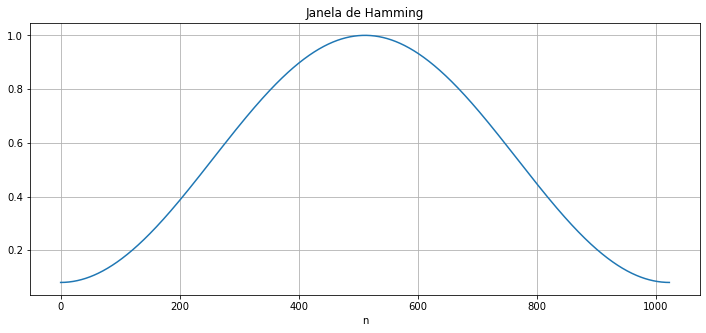

In [15]:
Tframe = 0.128    # largura da janela de análise em s
print('Tframe =', Tframe, 's')
Toverlap = 0.064  # sobreposiçao das janelas em s
print('Toverlap =', Toverlap, 's')
Nframe = np.int(np.round(Tframe*fs))       # número de amostras na janela
print('Nframe =', Nframe)
Noverlap = np.int(np.round(Toverlap*fs))   # número de amostras sobrepostas na janela
print('Noverlap =', Noverlap)

h = np.hamming(Nframe)   # janela de hamming

plt.figure(figsize=(12,5))
plt.plot(np.arange(Nframe),h)
plt.title('Janela de Hamming')
plt.xlabel('n')
plt.grid()
plt.show()

In [16]:
# calcular o vetor de frequências
if np.mod(Nframe,2)==0:
    # se o número de pontos do sinal for par
    f = np.linspace(-fs/2,fs/2-fs/Nframe,Nframe)
else:
    # se o número de pontos do sinal for ímpar
    f = np.linspace(-fs/2+fs/Nframe/2,fs/2-fs/Nframe/2,Nframe)

f_relev = np.array([], dtype=np.float64)
nframes = 0    # para guardar
tframes = np.array([], dtype=np.float64)

for ii in range(0,N-Nframe+2,Nframe-Noverlap):
    # aplicar a janela ao sinal do tempo
    x_frame = x[ii:ii+Nframe]*h
    
    # obter a magnitude da fft do sinal
    m_X_frame = np.abs(np.fft.fftshift(np.fft.fft(x_frame)))
    
    # obter o máximo da magnitude do sinal
    m_X_frame_max = max(m_X_frame)

    # encontrar os índices do máximo da magnitude do sinal
    ind_freq = np.where(abs(m_X_frame-m_X_frame_max)<0.001)
    
    # encontrar as frequências correspondentes ao máximo de magnitude
    f_relev = np.append(f_relev, f[ind_freq[0][1]])
   
    nframes = nframes+1
    
    # calcular o vetor de tempo correspondente a cada janela, que aqui
    # corresponde ao valor do vetor de tempos, t, em cada janela
    t_frame = t[ii:ii+Nframe]
    tframes = np.append(tframes, t_frame[int(np.round(Nframe/2))])

print('Sequência de frequências identificadas em cada janela [Hz]:')
print(f_relev)

Sequência de frequências identificadas em cada janela [Hz]:
[257.8125 257.8125 296.875  296.875  328.125  328.125  328.125  351.5625
 351.5625 390.625  390.625  437.5    437.5    437.5    492.1875 492.1875
 523.4375]


**Exercício 3.2** Indicar a resolução em frequência em cada janela e representar graficamente a sucessão temporal de frequências mais relevantes do sinal em função da frequência $f$ em Hz.

FP8 - Exercício 3.2
Resolução em frequência por janela [Hz]:
 7.8125
tframes:
 [0.064 0.128 0.192 0.256 0.32  0.384 0.448 0.512 0.576 0.64  0.704 0.768
 0.832 0.896 0.96  1.024 1.088]
tframes (alternativo):
 [0.064 0.128 0.192 0.256 0.32  0.384 0.448 0.512 0.576 0.64  0.704 0.768
 0.832 0.896 0.96  1.024 1.088]


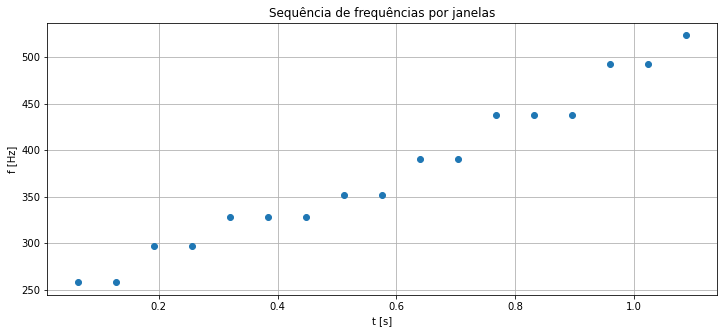

In [17]:
print('FP8 - Exercício 3.2')
# Ex. 3.2

deltaf = fs/Nframe
print('Resolução em frequência por janela [Hz]:\n', deltaf)
deltat = Tframe-Toverlap

tframes
print('tframes:\n', tframes)
# outra maneira de calcular o tframes tendo como valor 
# o tempo de início da janela
tframes2 = np.arange(deltat,deltat*(nframes+1),deltat)
print('tframes (alternativo):\n', tframes2)

plt.figure(figsize=(12,5))
plt.plot(tframes,f_relev,'o')
plt.title('Sequência de frequências por janelas')
plt.ylabel('f [Hz]');
plt.xlabel('t [s]')
plt.grid()
plt.show()

**Exercício 3.3** Comparar o resultado com o espectrograma obtido com a função ***spectrogram***.

FP8 - Exercício 3.3


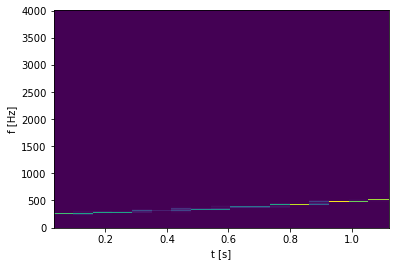

Sequência de frequências identificadas em cada janela [Hz]:
[257.8125 257.8125 296.875  296.875  328.125  328.125  328.125  351.5625
 351.5625 390.625  390.625  437.5    437.5    437.5    492.1875 492.1875
 523.4375]


In [18]:
print('FP8 - Exercício 3.3');
# Ex 3.3 

f,t,Sxx = spectrogram(x,fs,'hamming',Nframe,Noverlap)
plt.pcolormesh(t, f, Sxx, shading='auto')
plt.ylabel('f [Hz]')
plt.xlabel('t [s]')
plt.show()

# Encontrar os índices dos máximos em cada janela temporal
ind_max=np.argmax(Sxx,axis=0)
f_relev_spect = f[ind_max]
print('Sequência de frequências identificadas em cada janela [Hz]:')
print(f_relev_spect)

**Exercício 3.4** Determinar a sequência de notas musicais associadas a essas frequências do sinal.

In [19]:
print('FP8 - Exercício 3.4')
# Ex 3.4

ind_nj = np.array([], dtype=np.int64)

for k in range(len(f_relev)):
    
    # encontrar quais as notas na gama de frequências 
    # [f_relev(k)-9Hz, f_relev(k)+9Hz]
    
    ind_freq = np.where(abs(f_notas-f_relev[k])<9)
    ind_nj = np.append(ind_nj,ind_freq)

print('Sequência de notas musicais em cada janela [Hz]:')
notas_xj = notas[ind_nj]
print(notas_xj)

FP8 - Exercício 3.4
Sequência de notas musicais em cada janela [Hz]:
['Dó   ' 'Dó   ' 'Ré   ' 'Ré   ' 'Mi   ' 'Mi   ' 'Mi   ' 'Fá   ' 'Fá   '
 'Sol  ' 'Sol  ' 'Lá   ' 'Lá   ' 'Lá   ' 'Si   ' 'Si   ' 'Dó2  ']
